<a href="https://colab.research.google.com/github/jcheek16/codepath-prework/blob/main/Assignments/assignment_4_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_4_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline



## Step 1: Initial Data Understanding

 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [18]:
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/adviseinvest_historical_data.csv"
df = pd.read_csv(url)
df.head()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [16]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Stats:\n", df.describe(include="all"))

Shape: (29504, 14)

Data Types:
 answered            int64
income              int64
female             object
age                 int64
job                 int64
num_dependents      int64
rent                int64
own_res             int64
new_car           float64
chk_acct            int64
sav_acct            int64
num_accts           int64
mobile              int64
product             int64
dtype: object

Summary Stats:
             answered         income female           age           job  \
count   29504.000000   29504.000000  29504  29504.000000  29504.000000   
unique           NaN            NaN      3           NaN           NaN   
top              NaN            NaN      0           NaN           NaN   
freq             NaN            NaN  27903           NaN           NaN   
mean        0.546638   33766.893303    NaN     34.773454      1.915401   
std         0.497829   29379.202710    NaN     11.369865      0.658183   
min         0.000000  -65600.000000    NaN     19.0000

In [17]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
 answered          0
income            0
female            0
age               0
job               0
num_dependents    0
rent              0
own_res           0
new_car           2
chk_acct          0
sav_acct          0
num_accts         0
mobile            0
product           0
dtype: int64

Duplicate Rows: 29035


# Step 2: Exploratory Data Analysis (EDA)
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


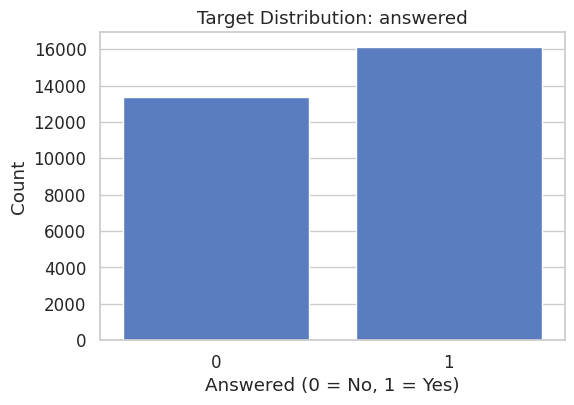

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='answered', data=df)
plt.title('Target Distribution: answered')
plt.xlabel('Answered (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

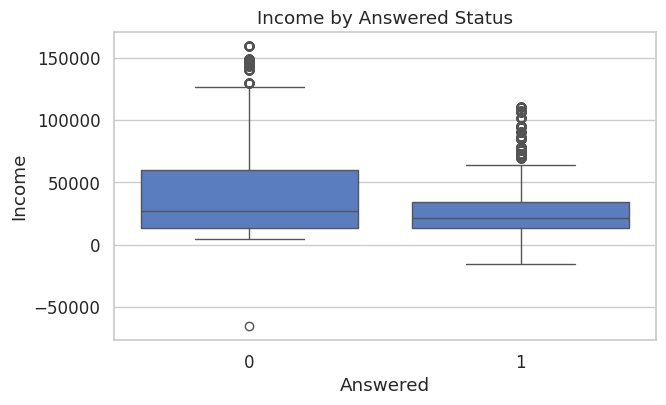

In [24]:
plt.figure(figsize=(7,4))
sns.boxplot(x='answered', y='income', data=df)
plt.title('Income by Answered Status')
plt.xlabel('Answered')
plt.ylabel('Income')
plt.show()


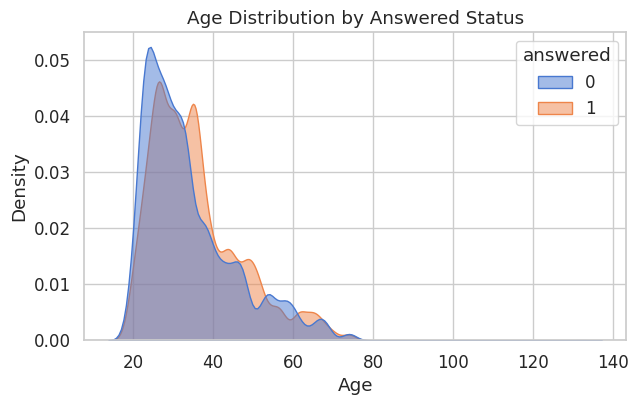

In [25]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x='age', hue='answered', fill=True, common_norm=False, alpha=0.5)
plt.title('Age Distribution by Answered Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


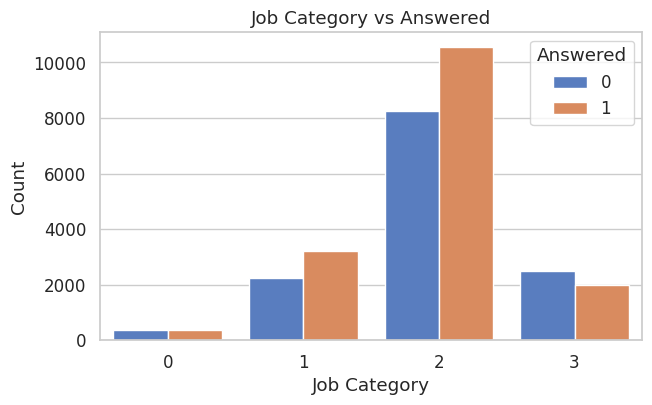

In [27]:
plt.figure(figsize=(7,4))
sns.countplot(x='job', hue='answered', data=df)
plt.title('Job Category vs Answered')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.legend(title='Answered')
plt.show()

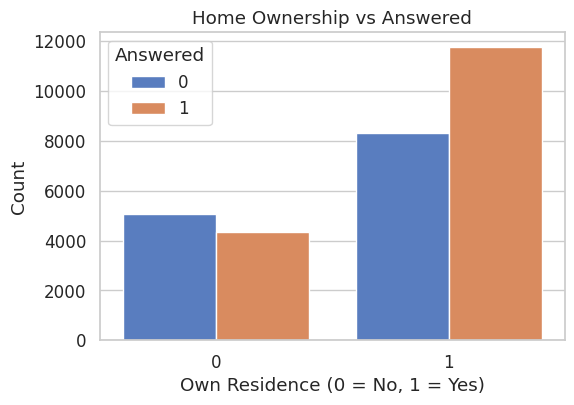

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='own_res', hue='answered', data=df)
plt.title('Home Ownership vs Answered')
plt.xlabel('Own Residence (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Answered')
plt.show()

# Step 3: Summarize Your Findings
### 3.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)

Write your response below: 🔧

The exploratory charts show that several independent variables have clear relationships with the target variable **`answered`**:

* **Income** – Customers who answered tend to have slightly lower median income, while the highest earners cluster more in the “did not answer” group. This makes income a meaningful predictor.  
* **Age** – Respondents are more concentrated in the late-20s to mid-30s range, while non-respondents skew slightly older. Age is an important demographic driver.  
* **Job Category** – Certain job categories (for example, category 2) have noticeably higher response rates than others, so job is an informative categorical variable.  
* **Home Ownership (`own_res`)** – Individuals who own their residence are more likely to respond, as shown by the clear gap between owners and non-owners.  
* **Gender (`female`)** – Shows only minor variation and may provide limited additional signal.

Other fields such as **number of accounts**, **mobile status**, and **new car purchase** show weaker or inconsistent patterns and may add less predictive power.

Because the business goal is to predict who will answer, **income, age, job category, and home ownership** stand out as the most applicable variables.  
These should be prioritized for modeling, while less informative or noisy fields (and extreme outliers/duplicates) should be cleaned or down-weighted before final analysis.



### 3.2: In what ways could the dataset be improved?  Are there any data quality issues or data types that should be fixed?

Write your response below: 🔧



* **Duplicate Records** – Over 29,000 duplicate rows were detected.  
  * Remove exact duplicates or aggregate them to avoid inflating model accuracy.

* **Outliers** – Several columns contain extreme values:
  * **Age** includes an unrealistic maximum of 132.
  * **num_accts** has a maximum of 3,345, far above the typical range.
  * These should be investigated, capped, or removed.

* **Negative Income** – Income values dip as low as –65,600, which is likely an entry error or requires clarification.

* **Data Types** –  
  * The `female` column is stored as an object/string but should be converted to a categorical/binary type for modeling.
  * Verify that other categorical fields (`job`, `own_res`, etc.) are treated as categories rather than numeric codes.

* **Missing Values** –  
  * The `new_car` column has a small number of missing entries that need imputation or removal.

* **Business Context** – Consider enriching the dataset with additional features such as geographic region or contact method to improve predictive power.

Cleaning these issues—deduplication, handling outliers, correcting data types, and filling or removing missing values—will lead to more reliable analysis and stronger predictive models.


## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [ ]:
!jupyter nbconvert --to html "assignment_04_LastnameFirstname.ipynb"